# AI2 Model Demonstration

This notebook demonstrates the performance of the trained VGG16 model on a set of example images. <br>
I will load the model, preprocess a few images, and use the model to make predictions to highlight its strengths and potential weaknesses.


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img


C:\Users\Mateusz\AppData\Local\Temp\ipykernel_17004\1949106470.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Loading the Best Model

In [3]:
model = load_model('best_network.h5')


# Fetching Images & Preprocessing
Based on the examples directory, I will fetch each image, and preprocess it to be the correct format expected by the model

In [4]:
examples_dir = './examples' 

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array


# Prediction & Visualisation
With the images preprocessed the model can be used to make predictions.<br>
I will also create a visualisation of each image, with it's prediction.<br><br>

Here's how the labels are created:<br>
Predictions less than 0.5 are classified as "Bicycle" and predictions equal to or greater than 0.5 as "Motorbike"<br>
For every image, the model predicts whether it is a "Bicycle" or a "Motorbike" and the output is a visualisation of the result.

1/1 [==============================] - 0s 171ms/step


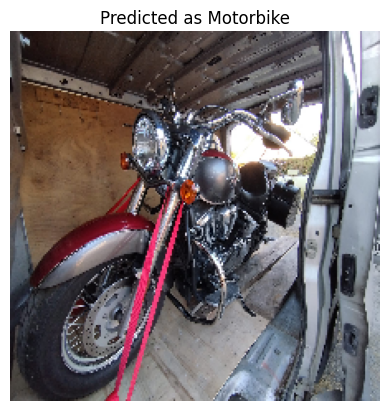

1/1 [==============================] - 0s 60ms/step


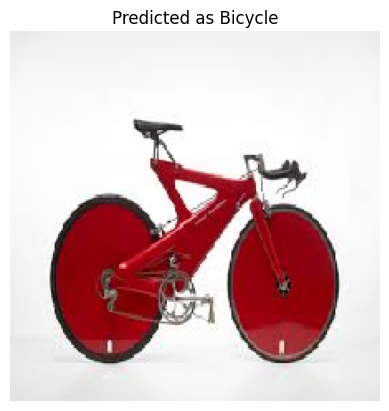

1/1 [==============================] - 0s 65ms/step


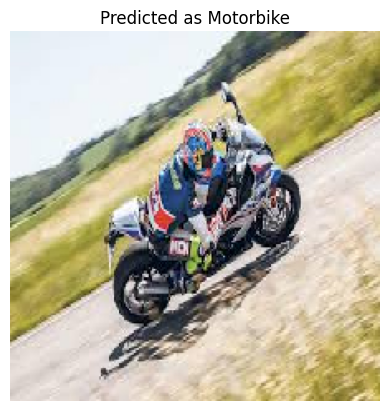

1/1 [==============================] - 0s 66ms/step


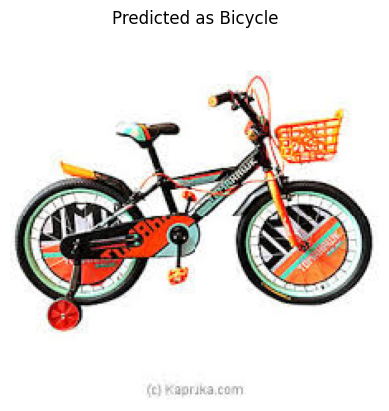

1/1 [==============================] - 0s 66ms/step


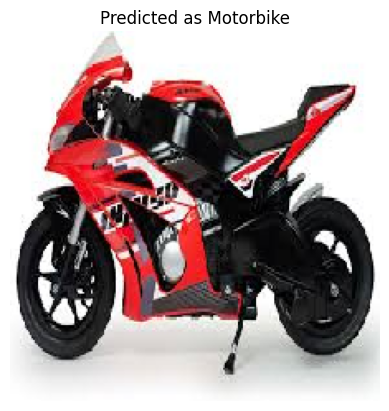

1/1 [==============================] - 0s 63ms/step


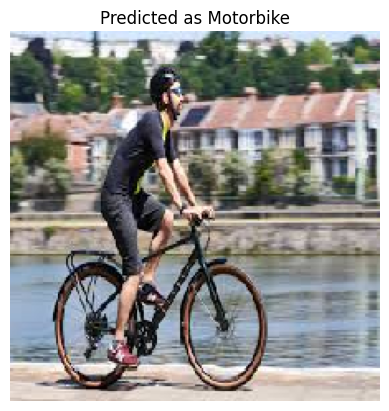

In [5]:
def plot_image_with_prediction(img_path, prediction):
    img = load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.title('Predicted as Bicycle' if prediction < 0.5 else 'Predicted as Motorbike')
    plt.axis('off')
    plt.show()


for img_file in os.listdir(examples_dir):
    img_path = os.path.join(examples_dir, img_file)
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    plot_image_with_prediction(img_path, prediction[0][0])


# Evaluation
Strengths:

- The model is able to accurately classify well-represented and clear images of motorbikes and bicycles. The model has pretty effectively learned distinguishing features for each class during training.
- The model seems to generalize well to different types of motorbikes and bicycles, suggesting that it can handle variability within the classes to a pretty precise extent.<br>

Weaknesses:

- It is clear, that in the gathering of the data, I've made one crucial mistake. The "Motorbike" dataset contains a lot of people with helmets, the "Bicycle" dataset doesn't contain a lot of people.
- The model seems to expect "Motorbikes" to be very bulky in comparison. This means the model mistakes people riding "Bicycles" as "Motorbikes" since it assumes that the person is part of the "Bicycle" and therefore it is bulkier, bigger and therefore is a "Motorbike". This then has a high chance of lowering the - accuracy of the model's predictions.
- The model may not perform well in real-world scenarios where the objects might be partially visible, or the image quality is not as clear as the training images, since it cannot identify the finer details like the difference in wheels or the handlebar.

Improvements:

- To improve the model's robustness, I would definitely expand the dataset with more humans riding "Bicycles" to improve it's prediction abilities and overall more varied images, including different angles, lighting conditions, and backgrounds.
- This would force the classifier to focus on the tinier details.
- Techniques such as attention mechanisms or spatial transformers could help the model focus on the most relevant parts of the image like the wheel structure, handlebars, lights & etc.
- Further detailed analysis of the misclassified details could help with further fine-tuning of the model.

In summary, while the VGG16 model demonstrates good performance on clear, well-represented images, it shows limitations when dealing with more complex scenes involving humans.<br>